In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("wine-clustering.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
pd.DataFrame(df).isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## Missing value Visualization

<Axes: >

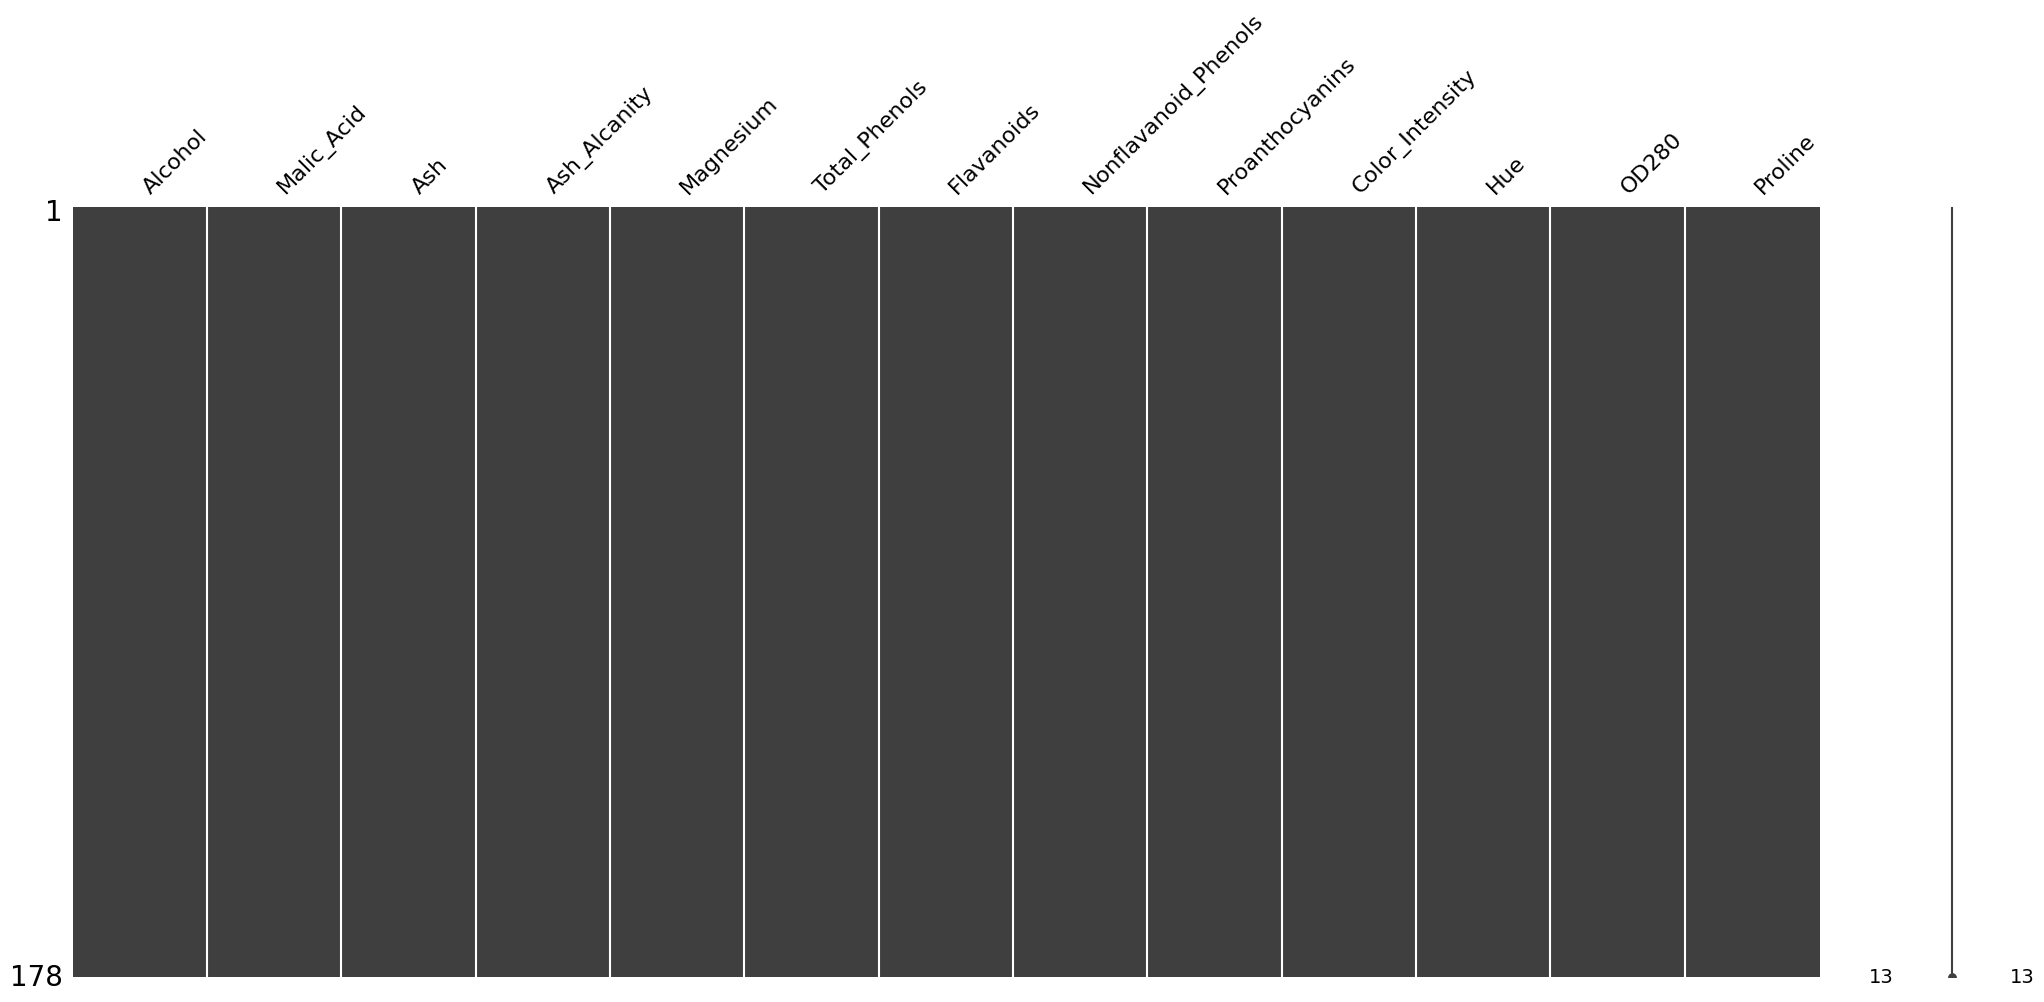

In [5]:
msno.matrix(df)

<Axes: >

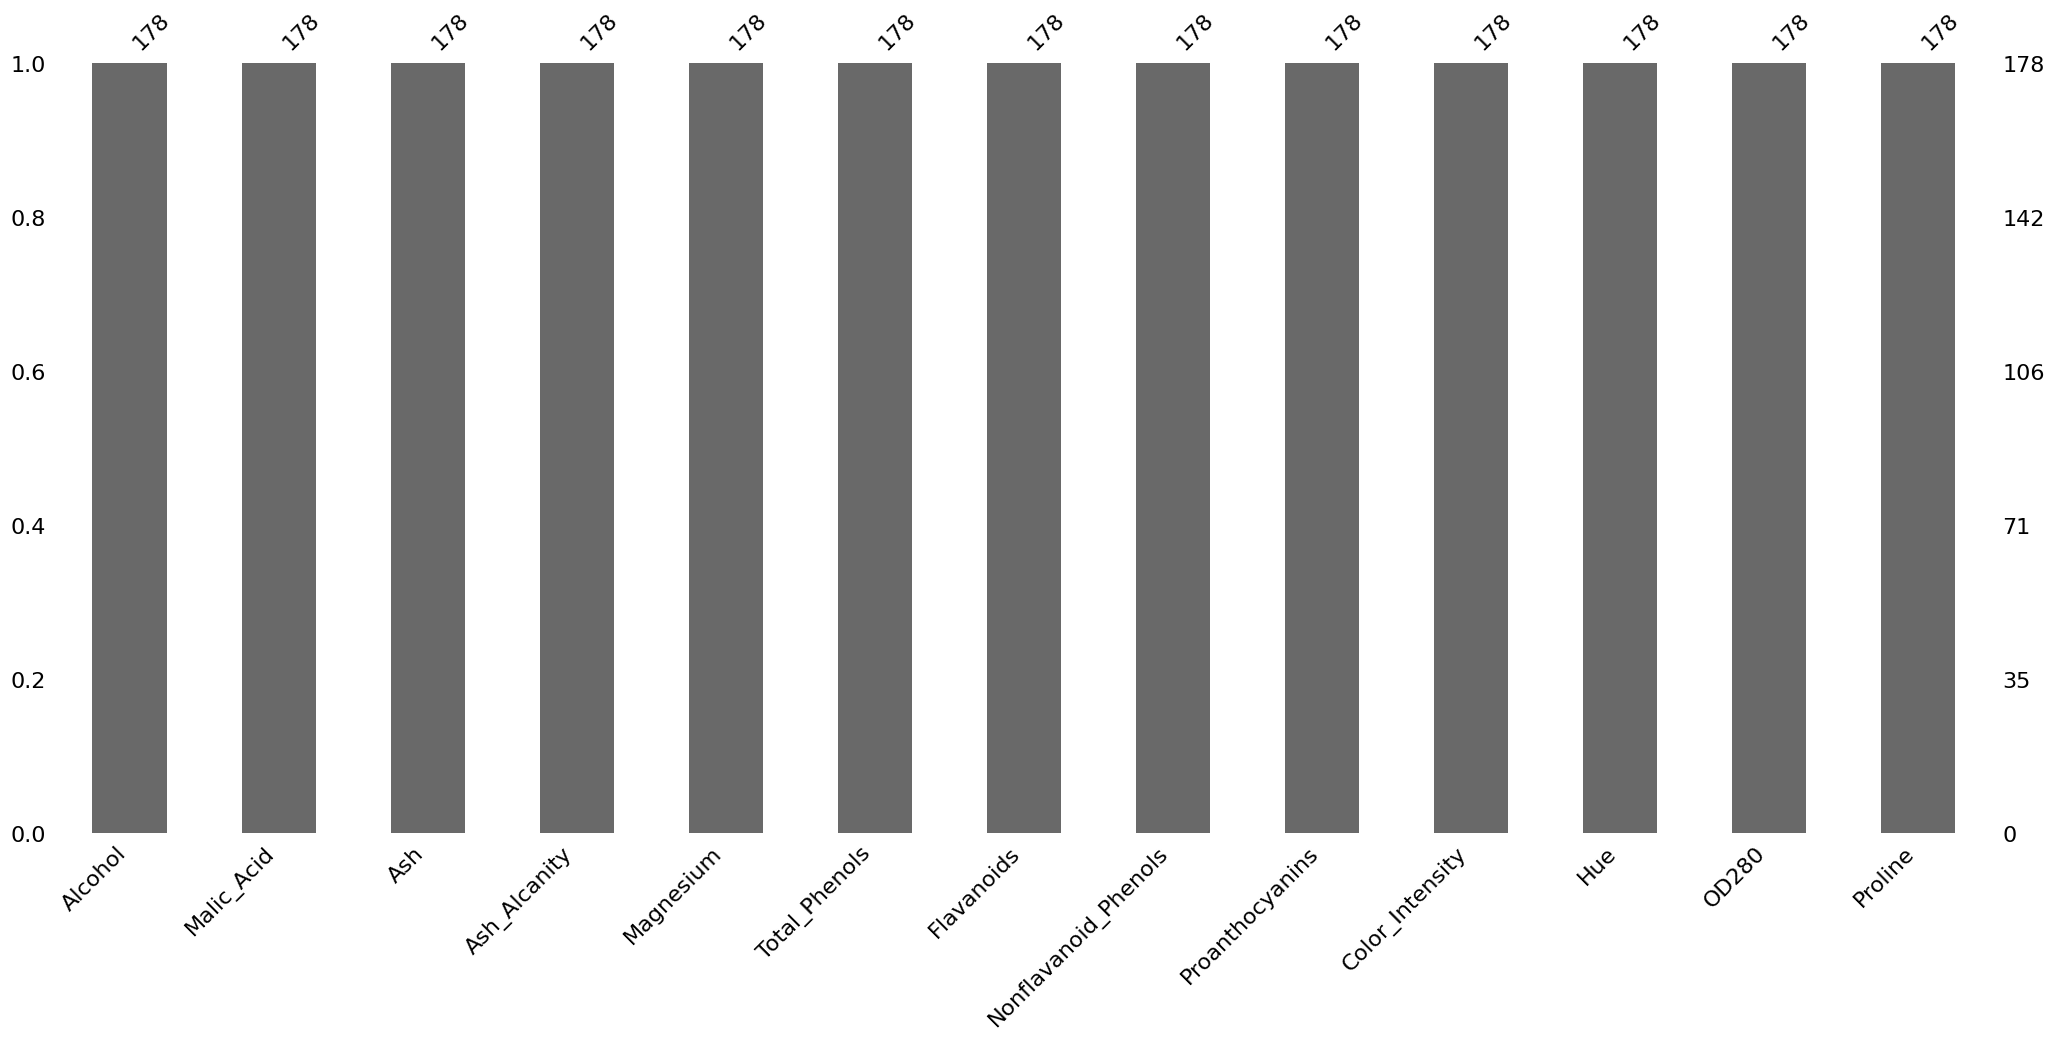

In [6]:
msno.bar(df)

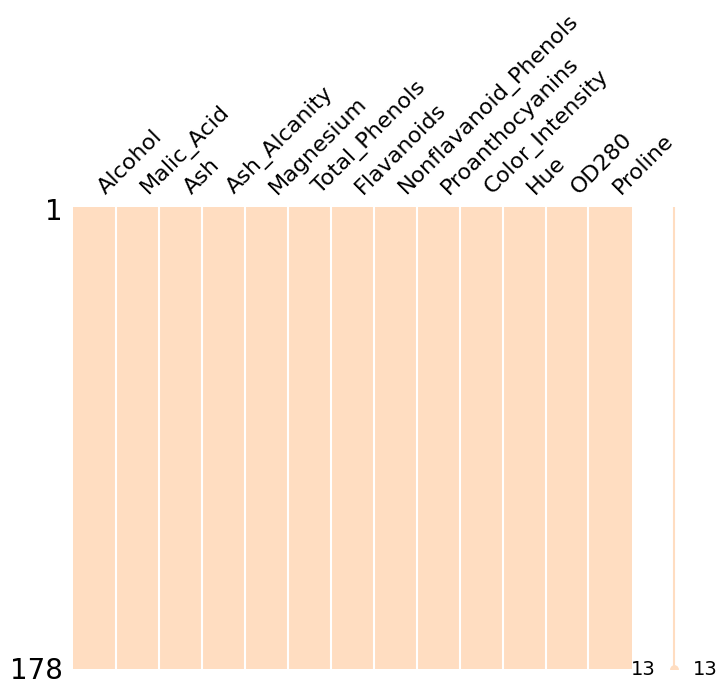

In [7]:
colors = sns.color_palette(['#FFDDC1', 'white'])
# Reshape the color array to match the shape of the missing values matrix
color_array = np.array(colors).reshape(1, -1)
# Visualize missing values using msno.matrix
msno.matrix(df, figsize=(8, 6), sparkline=True, color=colors[0])
plt.show()

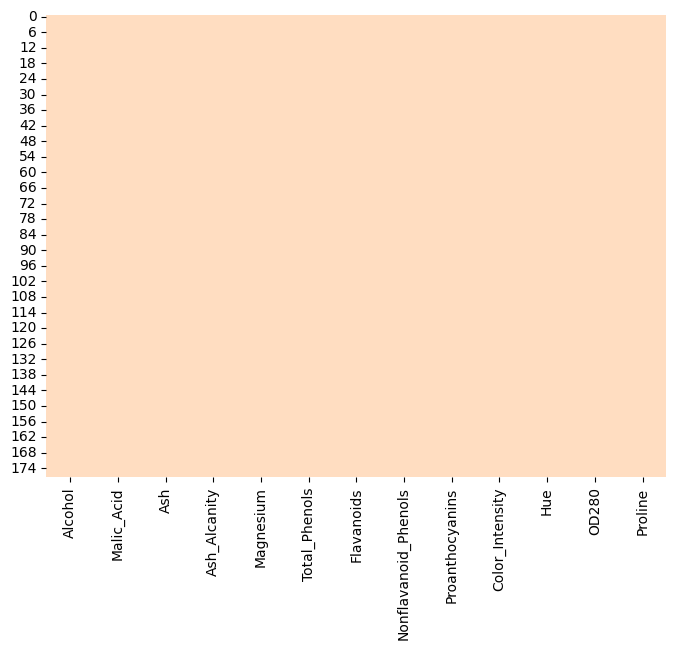

In [8]:
colors = ['#FFDDC1', 'white']
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors), cbar=False)
plt.show()

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Ash_Alcanity'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_Phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_Intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

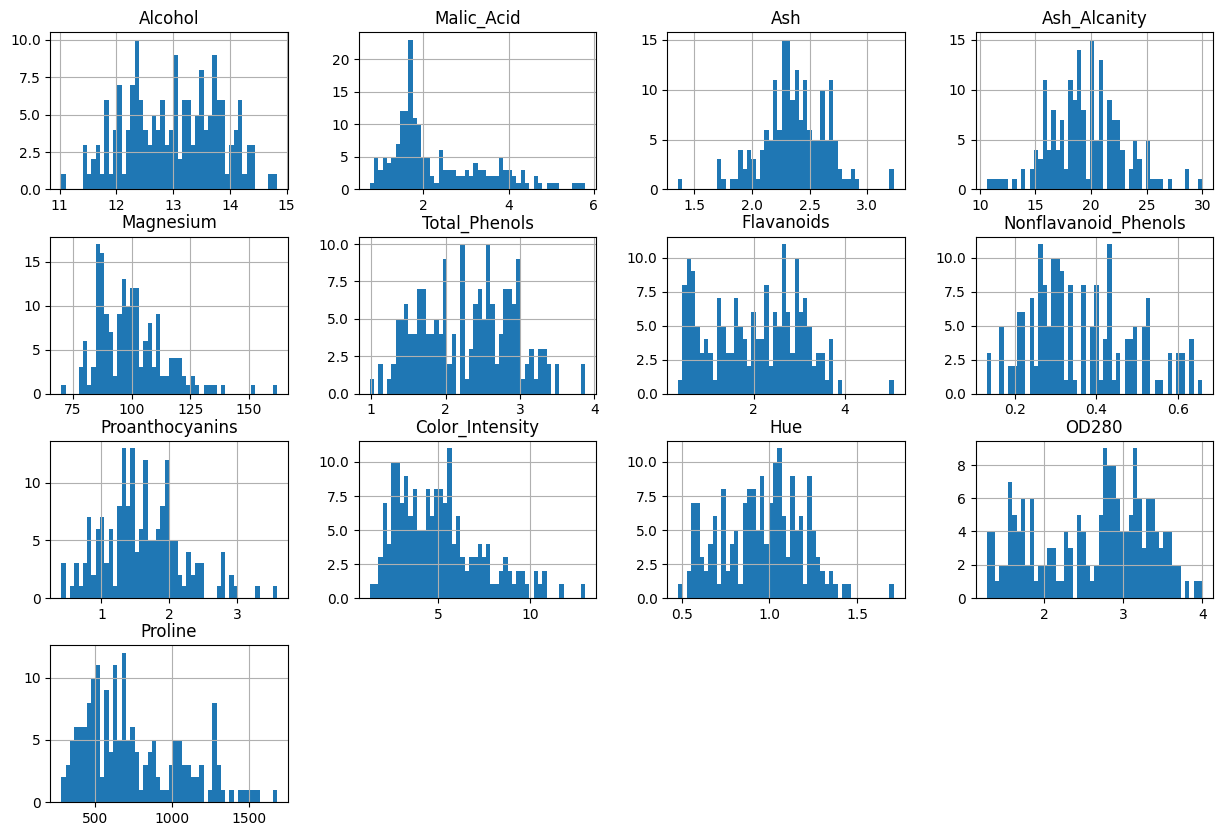

In [9]:
df.hist(bins=50,figsize=(15,10))

## Outliers Detection & Removing
#### using Normal Distribution
this is possible only in  normaly distributed columns.

In [10]:
# plt.figure(figsize=(16,5))
# # Iterate over each column
# for i, column in enumerate(df.columns):
#     plt.subplot(1, len(df.columns), i + 1)
#     sns.distplot(df[column])
#     plt.title(column)
# plt.show()

# # plt.figure(figsize=(16,5))
# # # Iterate over each column
# # for i, column in enumerate(df.columns[:3]):
# #     plt.subplot(1, 3, i + 1)
# #     sns.distplot(df.iloc[:, i], kde=True, bins=5)  # Adjust bins as needed
# #     plt.title(column)
# #     plt.tight_layout()  # Adjust layout for better spacing
# # plt.show()

In [11]:
# for column in df.columns:
#     print(f"Mean value of {column}: {df[column].mean()}")

In [12]:
# for column in df.columns:
#      print(f"Std. value of {column}: {df[column].std()}")

In [13]:
# for column in df.columns:
#     print(f"max value of {column}: {df[column].max()}")

In [14]:
# for column in df.columns:
#     print(f"min value of {column}: {df[column].min()}")

In [15]:
# percentile_df = df.copy()

In [16]:
# # Normally distributed columns.
# plt.figure(figsize=(16, 5))

# # Subplot 1
# plt.subplot(1, 3, 1)
# sns.distplot(df['Ash'])
# plt.title('Distribution Plot for "Ash"')
# plt.xlabel('Ash')
# plt.ylabel('Density')

# # Subplot 2
# plt.subplot(1, 3, 2)
# sns.distplot(df['Ash_Alcanity'])
# plt.title('Distribution Plot for "Ash_Alcanity"')
# plt.xlabel('Ash_Alcanity')
# plt.ylabel('Density')

# # Subplot 3
# plt.subplot(1, 3, 3)
# sns.distplot(df['Magnesium'])
# plt.title('Distribution Plot for "Magnesium"')
# plt.xlabel('Magnesium')
# plt.ylabel('Density')

# plt.show()

In [17]:
# print("Mean value of Ash_Alcanity", df['Ash_Alcanity'].mean())
# print("std value of Ash_Alcanity", df['Ash_Alcanity'].std())
# print("max value of Ash_Alcanity", df['Ash_Alcanity'].max())
# print("mea value of Ash_Alcanity", df['Ash_Alcanity'].min())

In [18]:
# # Finding the boundary values
# high = df['Ash_Alcanity'].mean() + 3 * df['Ash_Alcanity'].std()
# low = df['Ash_Alcanity'].mean() - 3 * df['Ash_Alcanity'].std()
# print("Highest allowed:", high)
# print("Lowest allowed:", low)

In [19]:
# # Finding the outliers
# df[(df['Ash_Alcanity']>high) | (df['Ash_Alcanity']<low)]

## "Trimming"

In [20]:
# df[(df['Ash_Alcanity']<high) & (df['Ash_Alcanity']>low)]

## "Calculatin the Z_score"

In [21]:
# df['Ash_zscore'] = (df['Ash']-df['Ash'].mean())/df['Ash'].std()
# df[(df['Ash_zscore'] > 3) | (df['Ash_zscore']< -3)]

In [22]:
# # treeming
# df[(df['Ash_zscore']<3) & (df['Ash_zscore']>-3)]

## capping

In [23]:
# upper_limit =  df['Ash_Alcanity'].mean() + 3 * df['Ash_Alcanity'].std()
# lower_limit =  df['Ash_Alcanity'].mean() - 3 * df['Ash_Alcanity'].std()
# lower_limit

In [24]:
# upper_limit

In [25]:
# df['Ash_Alcanity'].describe()

In [26]:
# df['Ash_Alcanity'] = np.where(df['Ash_Alcanity'] > upper_limit, upper_limit,
#                       np.where(df['Ash_Alcanity'] < lower_limit, lower_limit,
#                                df['Ash_Alcanity']))

In [27]:
# df['Ash_Alcanity'].describe()

## Outliers Detection using IQR (used when distribution is skewed)

C:\Users\ganes\AppData\Local\Temp\ipykernel_9892\1219716854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\AppData\Local\Temp\ipykernel_9892\1219716854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or

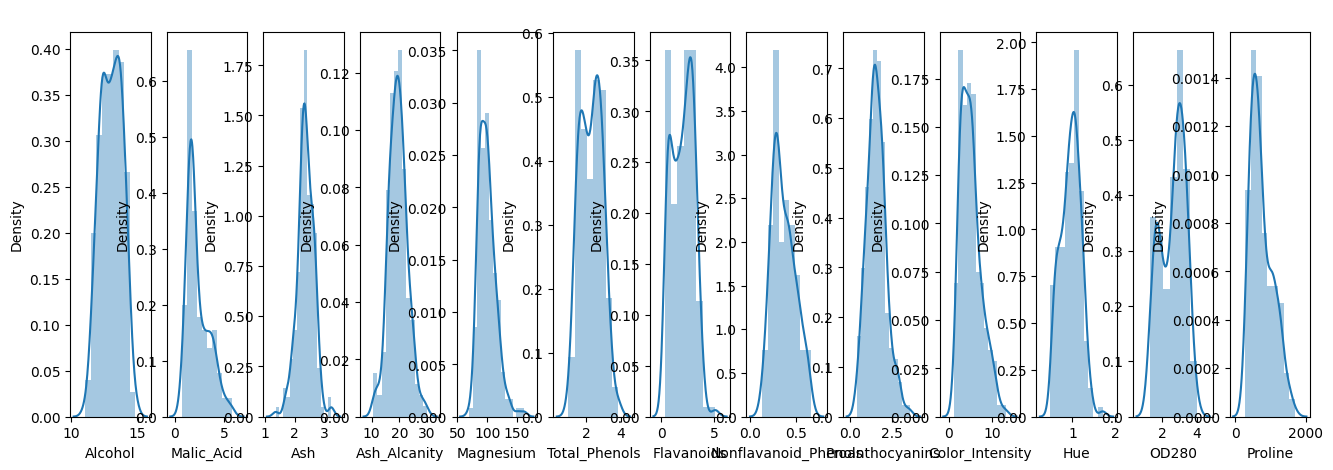

In [28]:
plt.figure(figsize=(16,5))
# Iterate over each column
for i, column in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i + 1)
    sns.distplot(df[column])
    plt.title(" ")
plt.show()

In [29]:
df["Ash_Alcanity"].skew()

0.21304688642645586

In [30]:
df["Malic_Acid"].skew()

1.0396511925814442

In [31]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
new_df = df.copy()

### Before Outliers Remove

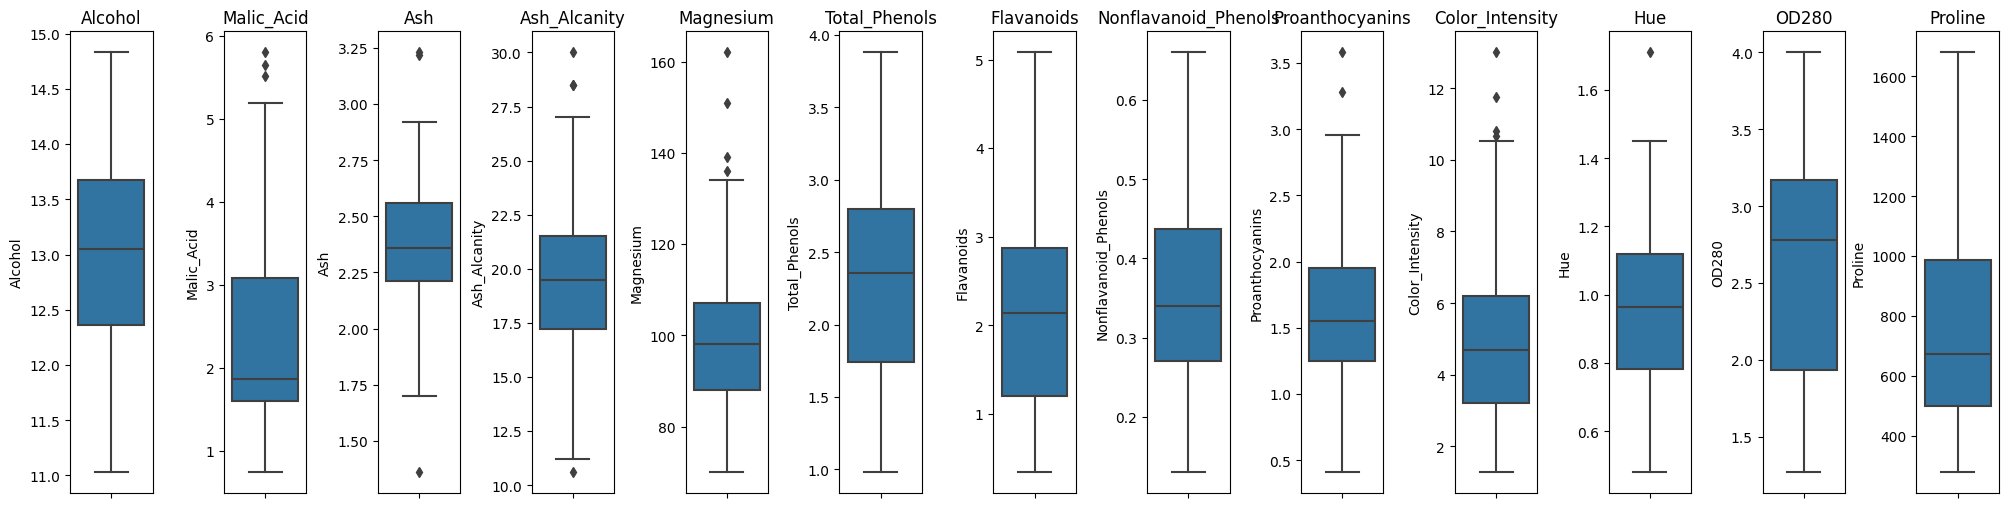

In [33]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Treaming

In [34]:
iqr_threshold = 1.5 # constant
numeric_colTream = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_colTream:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_threshold * iqr
    upper_bound = q3 + iqr_threshold * iqr
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

### After Outliers Remove

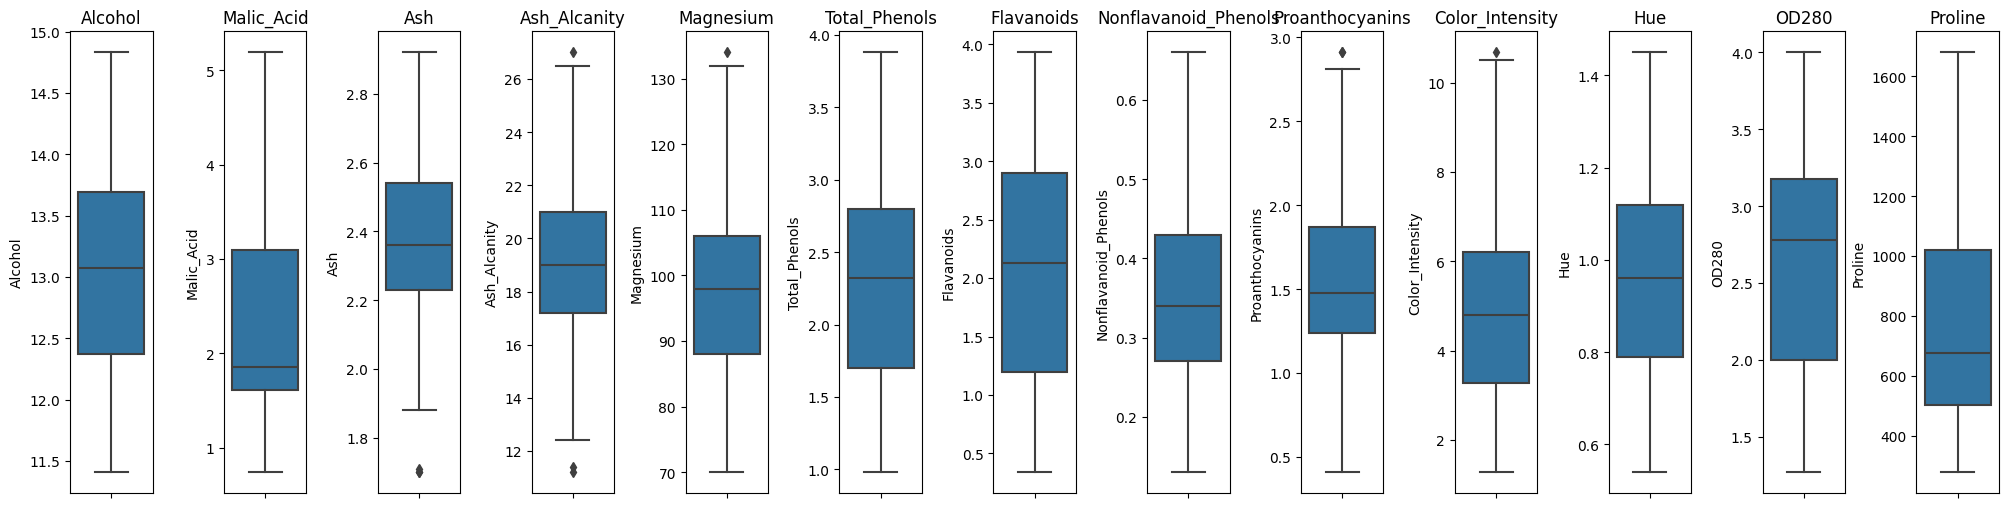

In [35]:
fig, axs = plt.subplots(ncols=len(numeric_colTream), figsize=(20, 5))

for i, column in enumerate(numeric_colTream):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Capping

In [36]:
iqr_threshold = 1.5 # constant
numeric_colCap = new_df.select_dtypes(include=['int', 'float']).columns
for column in numeric_colCap:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - iqr_threshold * iqr
    upper_limit = q3 + iqr_threshold * iqr
new_df[column] = np.where(new_df[column]>upper_limit, upper_limit,
             np.where(new_df[column]<lower_limit, lower_limit,
             new_df[column] ))

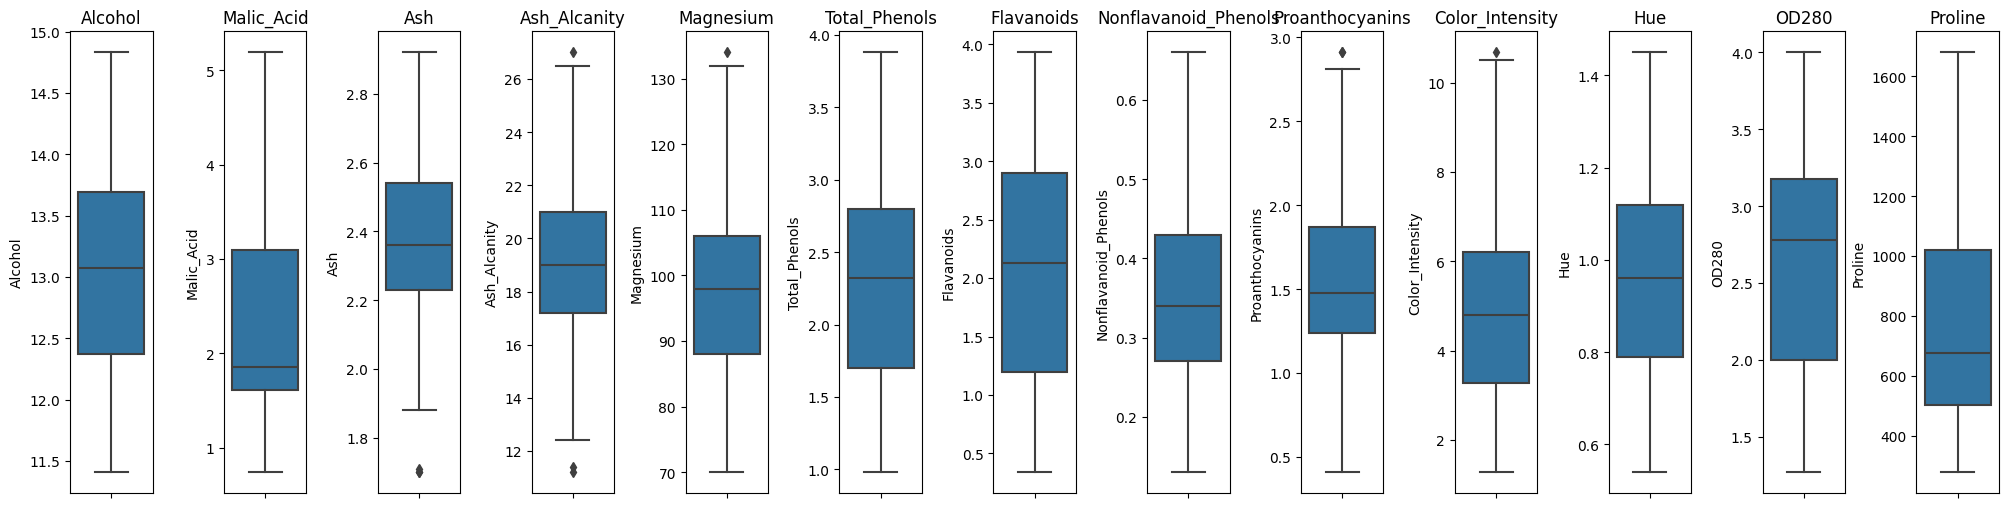

In [37]:
fig, axs = plt.subplots(ncols=len(numeric_colCap), figsize=(20, 5))

for i, column in enumerate(numeric_colCap):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

## Percentile "Treaming"

In [38]:
# percentile_tream = percentile_df.copy()

In [39]:
# iqr_threshold = 1.5 # constant
# numeric_Tream = percentile_tream.select_dtypes(include=['int', 'float']).columns
# for column in numeric_Tream:
#     q1 = percentile_tream[column].quantile(0.99)
#     q3 = percentile_tream[column].quantile(0.01)
#     percentile_tream[(percentile_tream[column] <= q1) & (percentile_tream[column] >= q3)] 

In [40]:
# q1

In [41]:
# q3

In [42]:
# fig, axs = plt.subplots(ncols=len(numeric_Tream), figsize=(20, 5))

# for i, column in enumerate(numeric_Tream):
#     sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
#     axs[i].set_title(f'{column}')
#     axs[i].set_xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# plt.show()

## Percentile "Capping ->>winsorisation"

In [43]:
# percentile_cap = percentile_df.copy()

In [44]:
# iqr_threshold = 1.5 # constant
# numeric_Cap = percentile_cap.select_dtypes(include=['int', 'float']).columns
# for column in numeric_Cap:
#     q1 = percentile_cap[column].quantile(0.99)
#     q3 = percentile_cap[column].quantile(0.01)
# percentile_cap[column] = np.where(percentile_cap[column]>q1, q1,
#              np.where(percentile_cap[column]<q3, q3,
#              percentile_cap[column] ))

In [45]:
# fig, axs = plt.subplots(ncols=len(numeric_Cap), figsize=(20, 5))

# for i, column in enumerate(numeric_Cap):
#     sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
#     axs[i].set_title(f'{column}')
#     axs[i].set_xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
# plt.show()

In [46]:
# plt.figure(figsize=(16,9))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='Set2')
# plt.show()

## StandardScaler
 When to use Standardization?
-> K-Means
-> K-Nearest-Neighbours
-> Principle Component Analysis(PCA)
->Artificial Neural Network
->Gradient Descent

In [47]:
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(df)

StandardScaler()

In [48]:
scaler.mean_

array([1.30345963e+01, 2.31819876e+00, 2.36465839e+00, 1.93006211e+01,
       9.85900621e+01, 2.28043478e+00, 2.02689441e+00, 3.59006211e-01,
       1.53875776e+00, 5.03391304e+00, 9.56931677e-01, 2.61987578e+00,
       7.53819876e+02])

In [49]:
# transform train and test sets
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.426439,0.182645,0.478259,0.235886,-0.613945,-0.957620,-1.356232,0.666936,-0.583238,2.171785,-1.554828,-1.279371,-0.296123
157,0.463146,1.515815,0.478259,1.247725,0.275823,-0.766235,-1.305127,0.584592,-0.251362,1.054728,-1.185655,-1.490285,-0.012057
158,0.298372,1.868152,-0.433962,0.235886,1.731807,-1.101159,-1.366453,0.584592,-0.368495,2.404505,-1.693268,-1.490285,0.256228
159,0.171623,0.258826,0.022149,0.235886,1.731807,-1.005466,-1.376675,1.408032,-0.153752,1.985609,-1.647122,-1.405919,0.272009


In [ ]:
np.round(X_train.describe(), 1)

In [ ]:
np.round(X_train_scaled.describe(), 1)

## Effect of Scaling

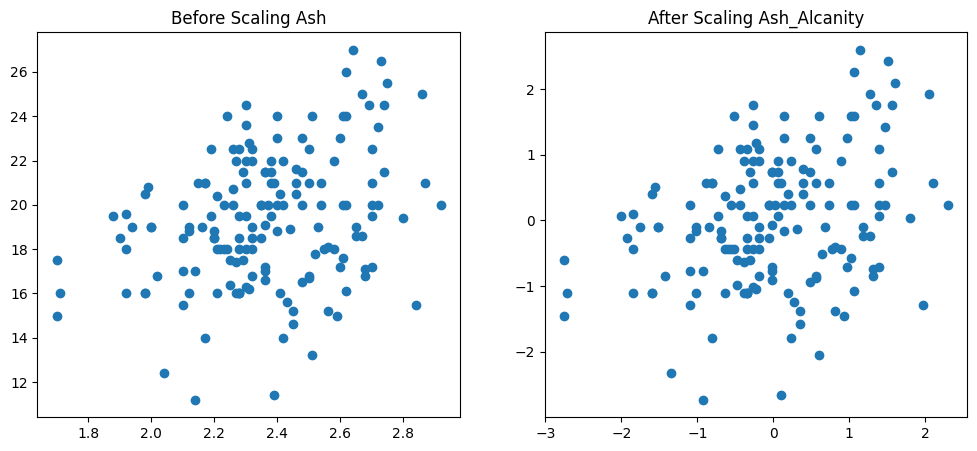

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
# Before Scaling
ax1.scatter(df['Ash'], df['Ash_Alcanity'])
ax1.set_title("Before Scaling Ash")

# After Scaling
ax2.scatter(df_scaled['Ash'], df_scaled['Ash_Alcanity'])
ax2.set_title("After Scaling Ash_Alcanity")
plt.show()

## Probability Density Function(PDF)

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

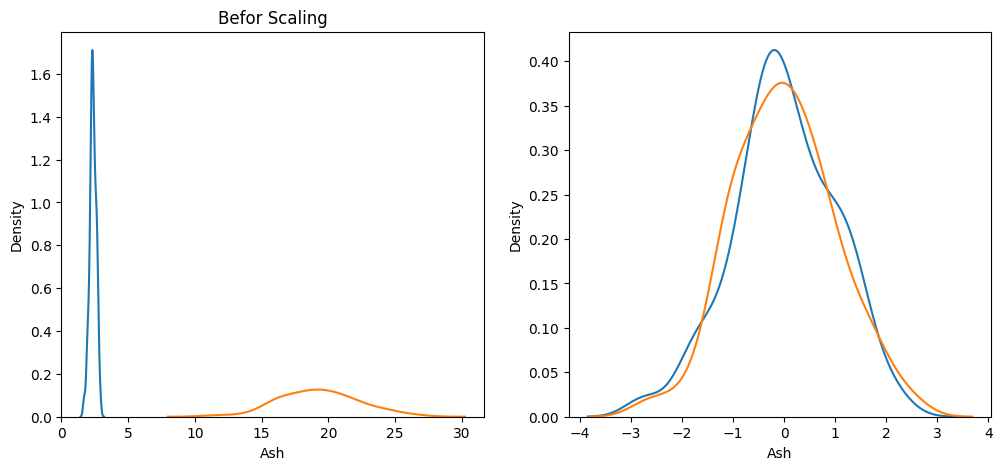

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
# Before Scaling
ax1.set_title('Befor Scaling')
sns.kdeplot(df['Ash'], ax = ax1)
sns.kdeplot(df['Ash_Alcanity'], ax = ax1)
# After Scaling
ax1.set_title('Befor Scaling')
sns.kdeplot(df_scaled['Ash'], ax = ax2)
sns.kdeplot(df_scaled['Ash_Alcanity'], ax = ax2)
plt.show()

## Comparison of Distributions

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


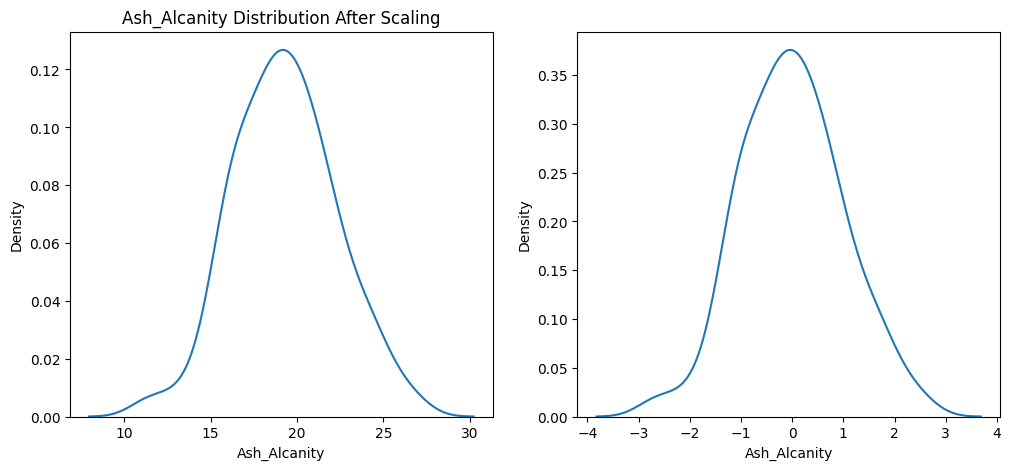

In [52]:
fig,(ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
# Before Scaling
ax1.set_title('Ash_Alcanity Distribution Befor Scaling')
sns.kdeplot(df['Ash_Alcanity'], ax = ax1)
# After Scaling
ax1.set_title('Ash_Alcanity Distribution After Scaling')
sns.kdeplot(df_scaled['Ash_Alcanity'], ax = ax2)
plt.show()

## Principle Component Analysis(PCA)

In [53]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
df_pca.head()

,PC1,PC2
0,311.649670,22.867839
1,296.191046,-3.939950
2,431.157383,-5.168271
3,726.334346,1.700587
4,-18.482769,19.708243


## K-means clustering algorithm

K-means is best used on smaller data sets because it iterates over all of the data points. That means it'll take more time to classify data points if there are a large amount of them in the data set.

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

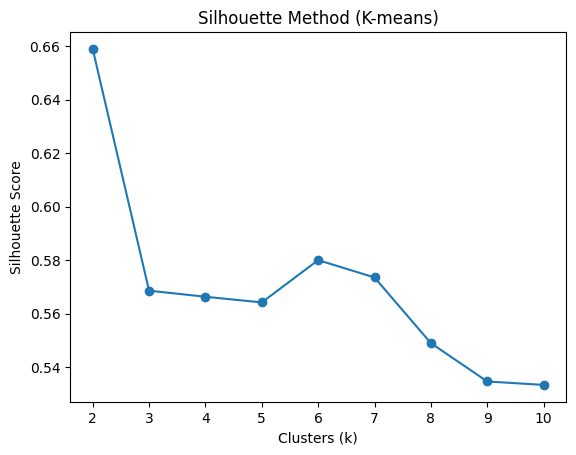

In [54]:
# K-means clustering
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    cluster_labels = kmeans.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (K-means)')
plt.show()

In [55]:
silhouette_avg

0.5333325401614991

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


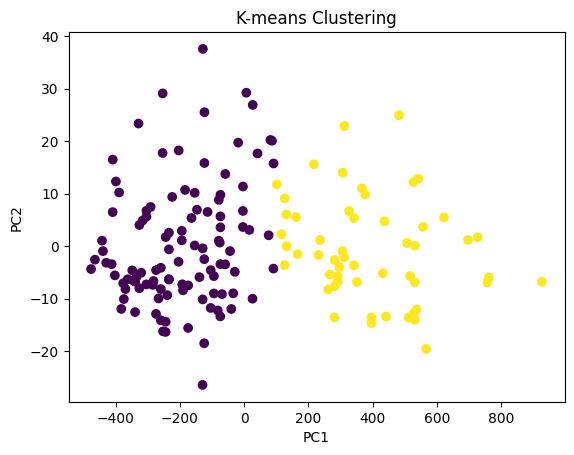

In [56]:
# K-means clustering
n_clusters = 2  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto")
cluster_labels = kmeans.fit_predict(df_pca)

# Plot the results
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [57]:
# # Fit KMeans with the optimal number of clusters (you need to determine this based on the silhouette plot)
# optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because k_values start from 2
# kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
# pred_optimal = kmeans_optimal.fit_predict(df_pca)

In [58]:
# # K-means clustering
# kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")  # Adjust the number of clusters as needed
# cluster_labels = kmeans.fit_predict(df_pca)

# # Calculate silhouette score for the entire dataset
# silhouette_avg = silhouette_score(df_pca, cluster_labels)
# print(f'Silhouette Score for K-means: {silhouette_avg}')


# # Scatter plot in PCA space
# plt.scatter(df_pca['PC1'], df_pca['PC2'], c=pred_optimal)
# plt.title(f'KMeans Clustering (k={optimal_k}) in PCA Space')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

## DBSCAN clustering algorithm

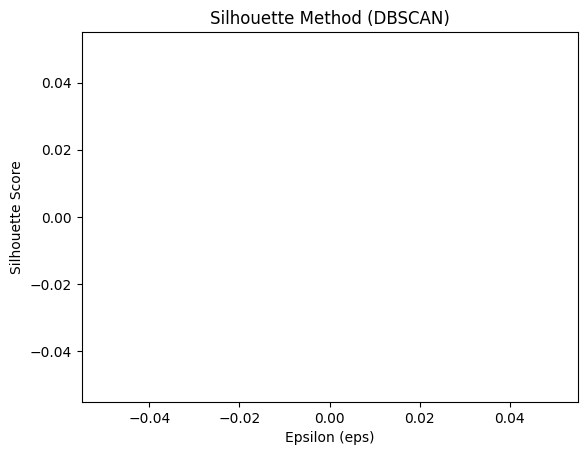

In [59]:
# DBSCAN clustering
eps_values = np.arange(0.1, 1.0, 0.1)  # Adjust epsilon values as needed
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    cluster_labels = dbscan.fit_predict(df_pca)
    
    unique_labels = np.unique(cluster_labels)
    
    # Check if more than one cluster (excluding noise points)
    if len(unique_labels) > 1:
        silhouette_avg = silhouette_score(df_pca, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(np.nan)  # Placeholder for cases with only noise points

# Plot silhouette scores
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (DBSCAN)')
plt.show()

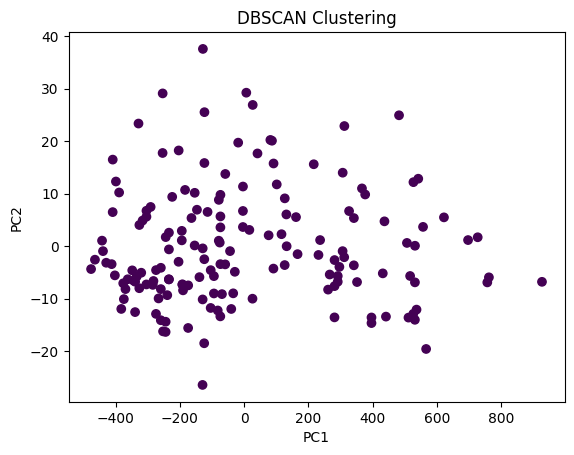

In [60]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust the parameters as needed
cluster_labels = dbscan.fit_predict(df_pca)

# Plot the results
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Gaussian Mixture Model algorithm

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

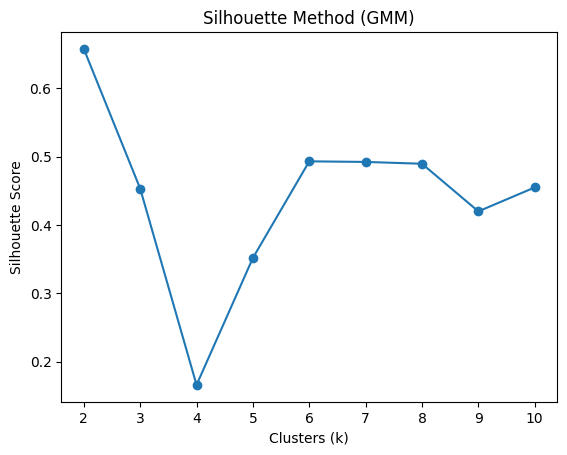

In [61]:
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    cluster_labels = gmm.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (GMM)')
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for GMM: 0.16569954933666647


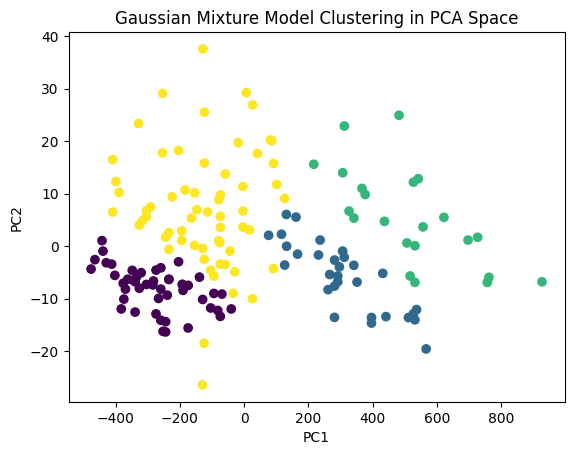

In [62]:
# GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
cluster_labels = gmm.fit_predict(df_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print(f'Silhouette Score for GMM: {silhouette_avg}')

# Scatter plot in PCA space
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title(f'Gaussian Mixture Model Clustering in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## BIRCH algorithm

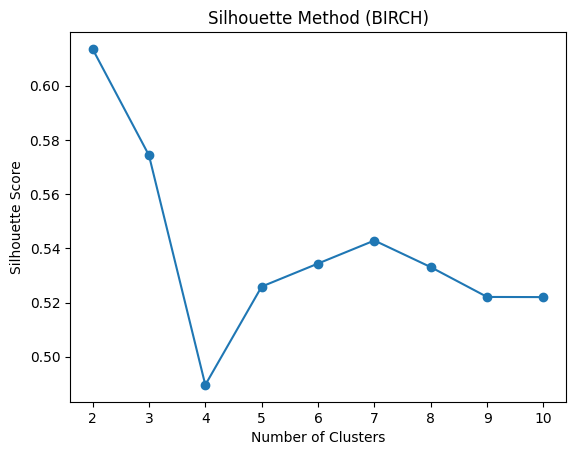

In [63]:
silhouette_scores = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    birch = Birch(threshold=0.5, n_clusters=n_clusters)
    cluster_labels = birch.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (BIRCH)')
plt.show()

In [64]:
# silhouette_scores = []
# thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  # Adjust thresholds as needed

# for threshold in thresholds:
#     birch = Birch(threshold=threshold, n_clusters=None)
#     cluster_labels = birch.fit_predict(df_pca)
    
#     silhouette_avg = silhouette_score(df_pca, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# plt.plot(thresholds, silhouette_scores, marker='o')
# plt.xlabel('Threshold')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method (BIRCH)')
# plt.show()


Silhouette Score for BIRCH: 0.4895881212535531


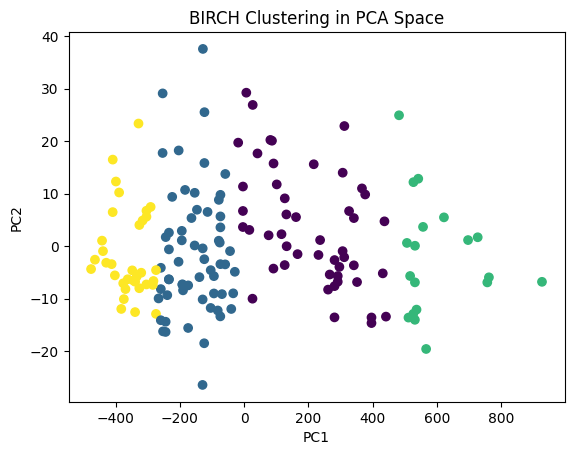

In [65]:
# BIRCH clustering
birch = Birch(threshold=0.5, n_clusters=4)  # Adjust the parameters as needed
cluster_labels = birch.fit_predict(df_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print(f'Silhouette Score for BIRCH: {silhouette_avg}')

# Scatter plot in PCA space
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title(f'BIRCH Clustering in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Affinity Propagation clustering algorithm

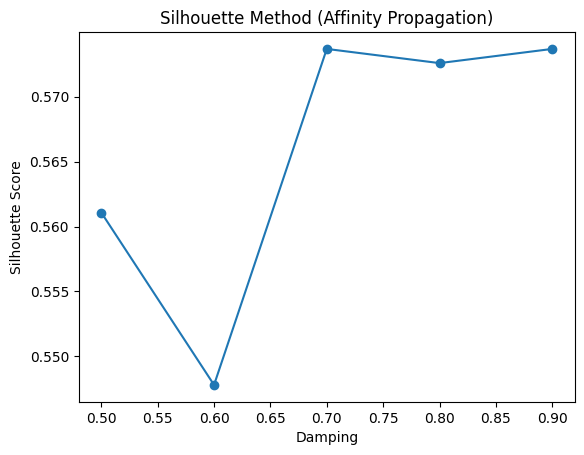

In [66]:
silhouette_scores = []
damping_values = [0.5, 0.6, 0.7, 0.8, 0.9]  # Adjust damping values as needed

for damping in damping_values:
    affinity_propagation = AffinityPropagation(damping=damping)
    cluster_labels = affinity_propagation.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(damping_values, silhouette_scores, marker='o')
plt.xlabel('Damping')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (Affinity Propagation)')
plt.show()

Silhouette Score for Affinity Propagation: 0.5477964010104773


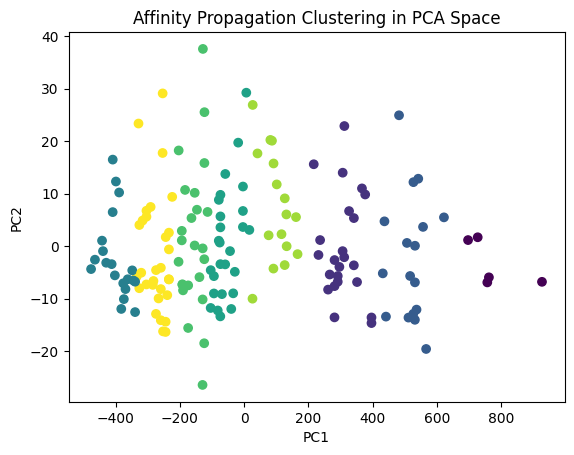

In [67]:
# Affinity Propagation clustering
affinity_propagation = AffinityPropagation(damping=0.60)  # Adjust the damping parameter as needed
cluster_labels = affinity_propagation.fit_predict(df_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print(f'Silhouette Score for Affinity Propagation: {silhouette_avg}')

# Scatter plot in PCA space
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title(f'Affinity Propagation Clustering in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## Mean-Shift clustering algorithm

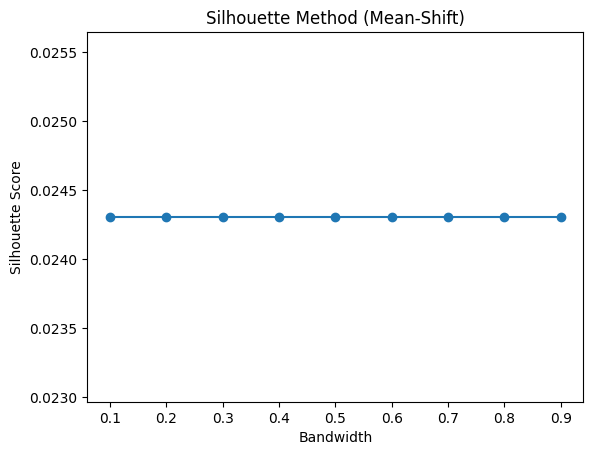

In [68]:
silhouette_scores = []
bandwidth_values = np.arange(0.1, 1.0, 0.1)  # Adjust bandwidth values as needed

for bandwidth in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bandwidth)
    cluster_labels = mean_shift.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(bandwidth_values, silhouette_scores, marker='o')
plt.xlabel('Bandwidth')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (Mean-Shift)')
plt.show()

Silhouette Score for Mean-Shift: 0.024305558541510505


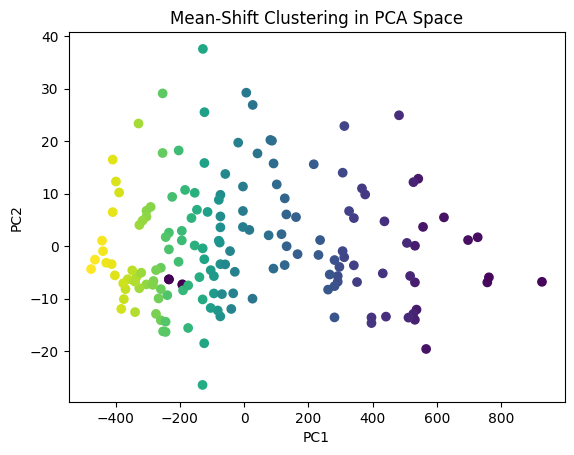

In [69]:
# Mean-Shift clustering
mean_shift = MeanShift(bandwidth=0.5)  # Adjust the bandwidth parameter as needed
cluster_labels = mean_shift.fit_predict(df_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print(f'Silhouette Score for Mean-Shift: {silhouette_avg}')
# Scatter plot in PCA space
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title(f'Mean-Shift Clustering in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## OPTICS algorithm

In [70]:
# from sklearn.metrics import silhouette_score, silhouette_samples

# # OPTICS clustering
# optics = OPTICS(min_samples=5, xi=0.05)  # Adjust the parameters as needed
# cluster_labels = optics.fit_predict(df_pca)

# # Check the number of unique labels
# unique_labels = np.unique(cluster_labels)
# if len(unique_labels) > 1:
#     # Calculate silhouette score for the entire dataset
#     silhouette_avg = silhouette_score(df_pca, cluster_labels)
#     print(f'Silhouette Score for OPTICS: {silhouette_avg}')

#     # Calculate silhouette score for each sample
#     silhouette_values = silhouette_samples(df_pca, cluster_labels)

#     # Display silhouette score for each sample
#     for label in unique_labels:
#         if label != -1:  # Ignore noise points
#             indices = cluster_labels == label
#             silhouette_avg_cluster = np.mean(silhouette_values[indices])
#             print(f'Silhouette Score for Cluster {label}: {silhouette_avg_cluster}')
# else:
#     print("OPTICS resulted in only one cluster or noise points. Silhouette score cannot be calculated.")
    
# # Scatter plot in PCA space
# plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
# plt.title(f'OPTICS Clustering in PCA Space')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

## Agglomerative Hierarchy clustering algorithm

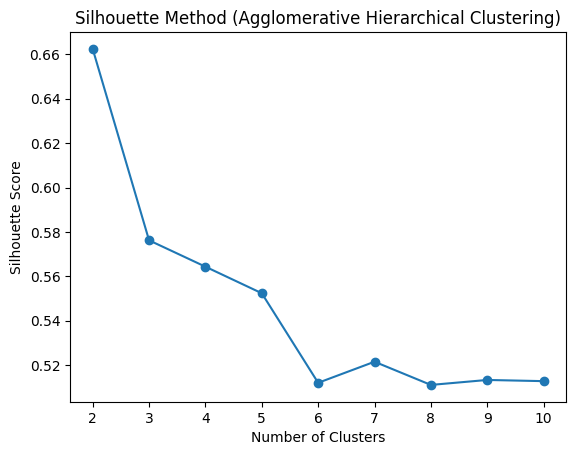

In [71]:
silhouette_scores = []
n_clusters_range = range(2, 11)

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)  # Adjust the number of clusters as needed
    cluster_labels = agglomerative.fit_predict(df_pca)
    
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method (Agglomerative Hierarchical Clustering)')
plt.show()

Silhouette Score for Agglomerative Hierarchical Clustering: 0.576205248833985


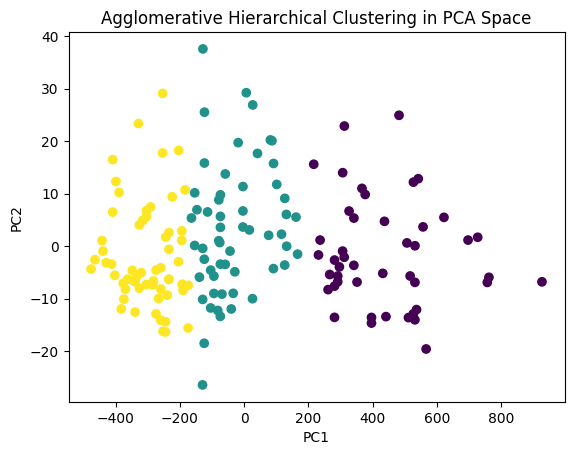

In [72]:
# Agglomerative Hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=3)  # Adjust the number of clusters as needed
cluster_labels = agglomerative.fit_predict(df_pca)

# Silhouette Score Calculation
silhouette_avg = silhouette_score(df_pca, cluster_labels)
print(f'Silhouette Score for Agglomerative Hierarchical Clustering: {silhouette_avg}')

# Scatter plot in PCA space
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=cluster_labels, cmap='viridis')
plt.title(f'Agglomerative Hierarchical Clustering in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()